In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset

sample_data_config = {
    "dataset": "MNIST",
    "batch_size": 32,
    "count_sampling": "EXACT",
    "pixel_sampling": "EXACT"
}

train_loader, val_loader, test_loader, image_shape = load_dataset(sample_data_config)

# Partial observations

This notebook showcases types of partial observations

## Count sampling

### Variable count sampling

With some precentage variates between a count and 0

### Exponential count sampling

Uses exponential distribution to sample number of pixels

### Power-law count sampling

Uses power law distribution to sample number of pixels



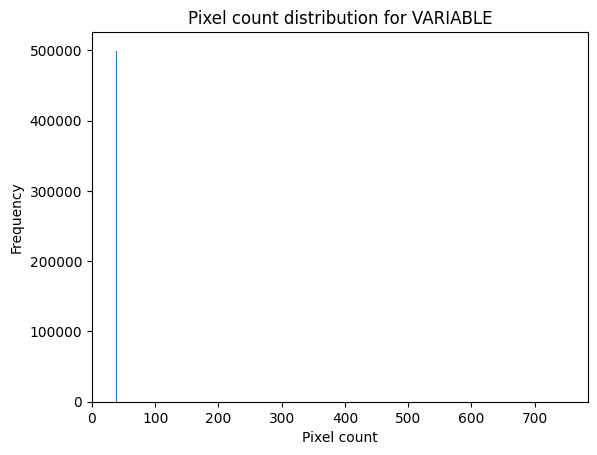

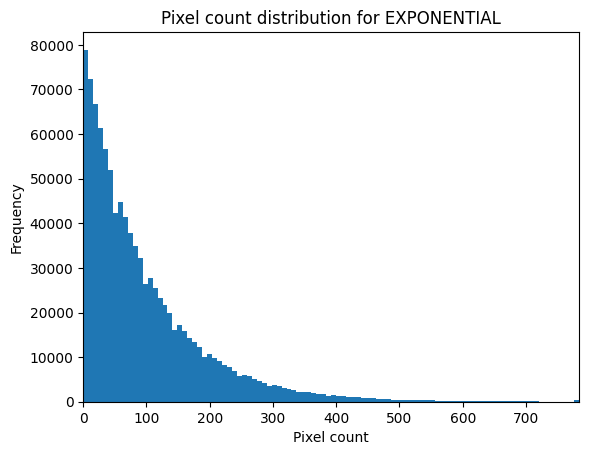

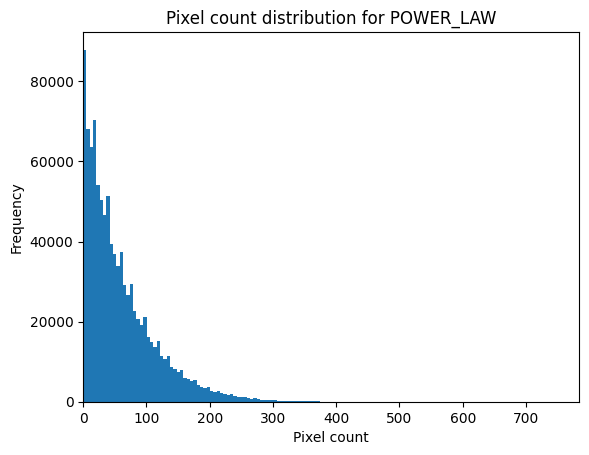

In [2]:
from datasets.observations import CountSamplingMethod

methods = [CountSamplingMethod.VARIABLE, CountSamplingMethod.EXPONENTIAL, CountSamplingMethod.POWER_LAW]

image = next(iter(train_loader))[0][0]

for method in methods:
    sampler = method.get_sampler()
    counts = []
    for i in range(1_000_000):
        counts.append(sampler.get_pixel_count(image))

    bins = 100
    plt.title(f"Pixel count distribution for {method.name}")
    plt.xlabel("Pixel count")
    plt.ylabel("Frequency")
    plt.xlim(0, image_shape[1] * image_shape[2])
    plt.hist(counts, bins=bins)
    plt.show()



In [4]:
from datasets.observations import CountSamplingMethod

variable_sampler = CountSamplingMethod.VARIABLE.get_sampler()

image = next(iter(train_loader))[0][0]

counts = []
for i in range(10_000):
    counts.append(variable_sampler.get_pixel_count(image))

# print frequency of each count
print({count: counts.count(count) for count in set(counts)})


{0: 4979, 39: 5021}


## Pixel Sampling

Three types of sampling implemented:

* Exact

        * Always the same pixels sampled(also the same count of pixels)

* Uniform

        * Samples given number of pixels from uniform distribution (every pixel has equal probability to be sampled)

* Gaussian

        * Sampls pixels from gaussian distribution where the center is the image center. The default std is image_size / 4. The output is clipped to only sample pixels from this image

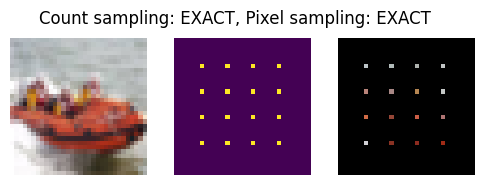

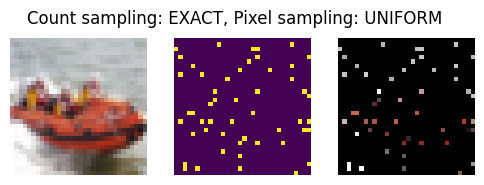

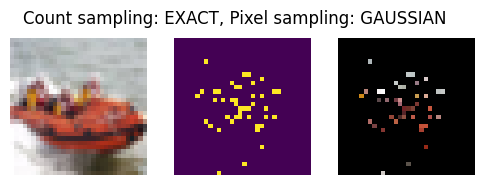

In [2]:
from plotting import plot_conditioned_examples
plot_conditioned_examples(next(iter(train_loader))[0][0])